### Gerekli kütüphaneler <a id="2"> </a>

In [1]:
#Gerekli kütüphaneleri yüklemekle başlayalım. 

import numpy as np
import pandas as pd
import seaborn as sns
import missingno   
import matplotlib.pyplot as plt 
from sklearn import preprocessing   
from warnings import filterwarnings
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

filterwarnings('ignore')

sns.set(rc={'figure.figsize':(10,8)})

df = pd.read_csv("../input/tablet/tablet.csv").copy()

## Keşifçi Veri Analizi <a id="3"> </a>

In [2]:
df.head() 

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [3]:
df.sample(5)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
445,832,Var,0.5,Yok,5.0,Var,22,0.6,198,1,8,343,1431,1666.0,20,Var,Var,Var,Ucuz,Turkuaz
1592,1344,Yok,1.5,Yok,1.0,Yok,14,0.5,190,1,3,419,556,2074.0,5,Var,Var,Yok,Ucuz,Gri
970,1579,Var,1.5,Yok,0.0,Yok,27,0.2,142,6,18,831,1484,1713.0,10,Var,Var,Var,Ucuz,Pembe
81,1002,Yok,2.6,Var,7.0,Yok,27,0.1,146,1,10,115,1111,1295.0,17,Var,Yok,Var,Çok Ucuz,Pembe
295,831,Yok,1.7,Var,7.0,Var,26,0.7,177,5,11,511,621,1704.0,20,Var,Var,Var,Çok Ucuz,Turuncu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 2000 entries, 0 to 1999

Data columns (total 20 columns):

 #   Column               Non-Null Count  Dtype  

---  ------               --------------  -----  

 0   BataryaGucu          2000 non-null   int64  

 1   Bluetooth            2000 non-null   object 

 2   MikroislemciHizi     2000 non-null   float64

 3   CiftHat              2000 non-null   object 

 4   OnKameraMP           1995 non-null   float64

 5   4G                   2000 non-null   object 

 6   DahiliBellek         2000 non-null   int64  

 7   Kalinlik             2000 non-null   float64

 8   Agirlik              2000 non-null   int64  

 9   CekirdekSayisi       2000 non-null   int64  

 10  ArkaKameraMP         2000 non-null   int64  

 11  CozunurlukYükseklik  2000 non-null   int64  

 12  CozunurlukGenislik   2000 non-null   int64  

 13  RAM                  1988 non-null   float64

 14  BataryaOmru          2000 non-null   int64  

 15  3G                

In [5]:
print("Gözlem sayımız : ", df.shape[0])
print("Öznitelik sayımız: ",df.shape[1])

Gözlem sayımız :  2000

Öznitelik sayımız:  20


In [6]:
df.isnull().sum()

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

### Kategorik değişkenlerin benzersiz değerlerinin kontrolü. Özniteliklerin incelenmesi  <a id="4"> </a>

In [7]:
df["Bluetooth"].unique()

array(['Yok', 'Var'], dtype=object)

In [8]:
df["CiftHat"].unique()

array(['Yok', 'Var'], dtype=object)

In [9]:
df["4G"].unique()

array(['Yok', 'Var'], dtype=object)

In [10]:
df["3G"].unique()

array(['Var', 'Yok'], dtype=object)

In [11]:
df["Dokunmatik"].unique()

array(['Yok', 'Var'], dtype=object)

In [12]:
df["WiFi"].unique()

array(['Yok', 'Var'], dtype=object)

In [13]:
df["FiyatAraligi"].unique()

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [14]:
df["Renk"].unique()

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

**Benzersiz değerlerin hangisinden kaçar tane var?**
### Dağılım incelemesi yapalım. <a id="5"> </a>

<AxesSubplot:xlabel='Renk', ylabel='count'>

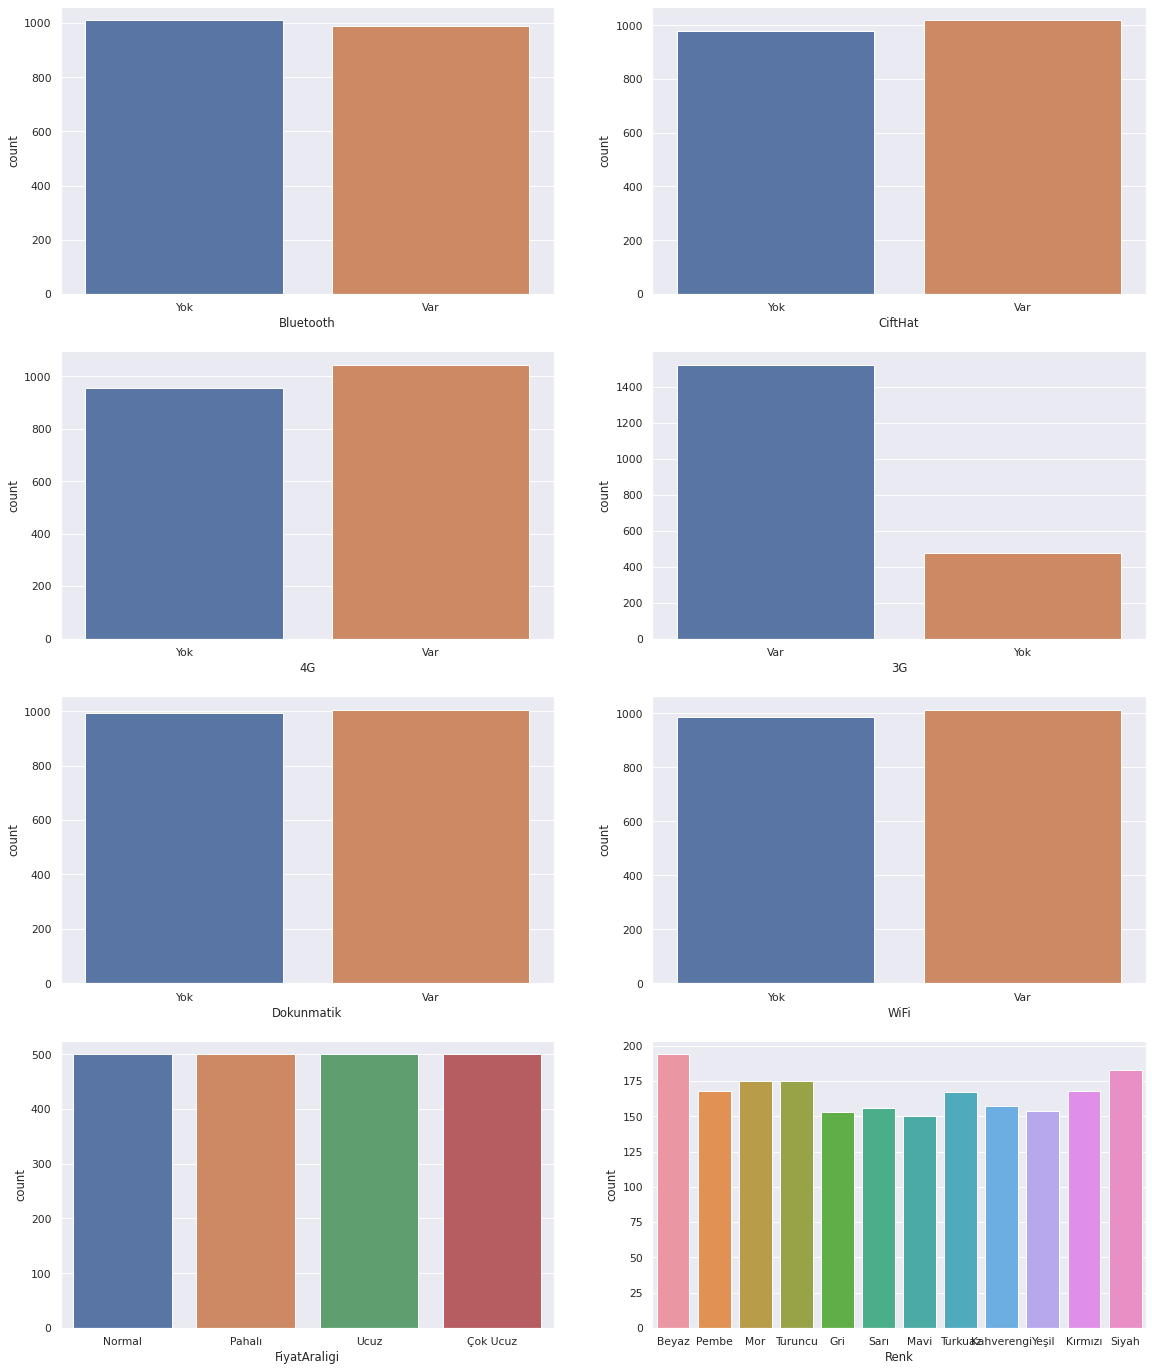

In [15]:
fig, axes = plt.subplots(ncols = 2, nrows = 4,figsize = (20,25), dpi = 70);
sns.countplot(df["Bluetooth"], ax = axes[0,0])
sns.countplot(df["CiftHat"], ax = axes[0,1])
sns.countplot(df["4G"], ax = axes[1,0])
sns.countplot(df["3G"], ax = axes[1,1])
sns.countplot(df["Dokunmatik"], ax = axes[2,0])
sns.countplot(df["WiFi"], ax = axes[2,1])
sns.countplot(df["FiyatAraligi"], ax = axes[3,0])
sns.countplot(df["Renk"], ax = axes[3,1])

In [16]:
df.dtypes

BataryaGucu              int64
Bluetooth               object
MikroislemciHizi       float64
CiftHat                 object
OnKameraMP             float64
4G                      object
DahiliBellek             int64
Kalinlik               float64
Agirlik                  int64
CekirdekSayisi           int64
ArkaKameraMP             int64
CozunurlukYükseklik      int64
CozunurlukGenislik       int64
RAM                    float64
BataryaOmru              int64
3G                      object
Dokunmatik              object
WiFi                    object
FiyatAraligi            object
Renk                    object
dtype: object

### İstatiksel verilerin incelenmesi <a id="6"> </a>

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


array([[<AxesSubplot:title={'center':'BataryaGucu'}>,
        <AxesSubplot:title={'center':'MikroislemciHizi'}>,
        <AxesSubplot:title={'center':'OnKameraMP'}>],
       [<AxesSubplot:title={'center':'DahiliBellek'}>,
        <AxesSubplot:title={'center':'Kalinlik'}>,
        <AxesSubplot:title={'center':'Agirlik'}>],
       [<AxesSubplot:title={'center':'CekirdekSayisi'}>,
        <AxesSubplot:title={'center':'ArkaKameraMP'}>,
        <AxesSubplot:title={'center':'CozunurlukYükseklik'}>],
       [<AxesSubplot:title={'center':'CozunurlukGenislik'}>,
        <AxesSubplot:title={'center':'RAM'}>,
        <AxesSubplot:title={'center':'BataryaOmru'}>]], dtype=object)

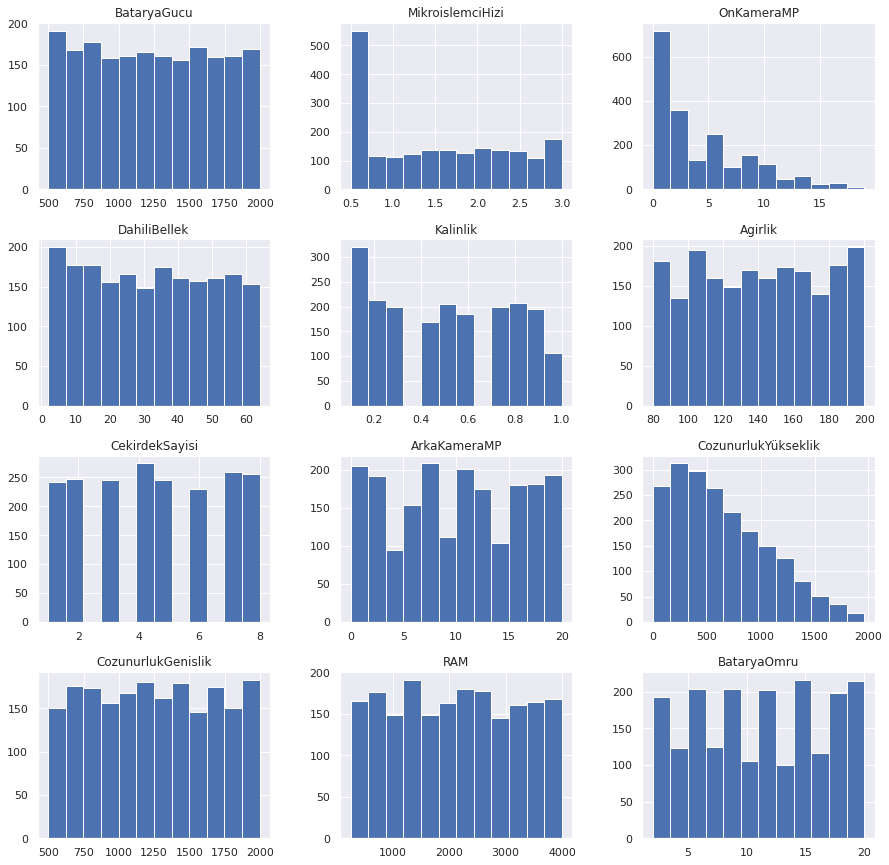

In [18]:
df.hist(bins=12, figsize=(15, 15))

In [19]:
df.groupby(["FiyatAraligi"]).mean().T


FiyatAraligi,Normal,Pahalı,Ucuz,Çok Ucuz
BataryaGucu,1228.3200,1379.98400,1228.8680,1116.902000
MikroislemciHizi,1.5298,1.52040,1.4886,1.550200
OnKameraMP,4.4980,4.31600,4.3400,4.092929
DahiliBellek,30.9200,33.97600,32.1160,31.174000
Kalinlik,0.4908,0.50200,0.5240,0.490200
Agirlik,143.6140,136.32000,140.5100,140.552000
CekirdekSayisi,4.6820,4.50200,4.2980,4.600000
ArkaKameraMP,10.0180,10.15000,9.9240,9.574000
CozunurlukYükseklik,632.2840,744.84800,666.8920,536.408000
CozunurlukGenislik,1234.0460,1369.83800,1251.9080,1150.270000


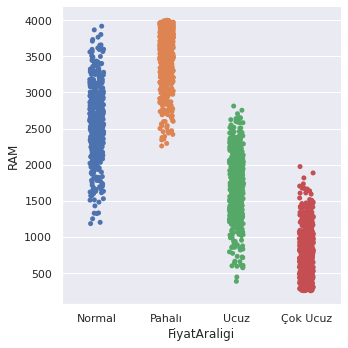

In [20]:
sns.catplot(x="FiyatAraligi", y="RAM",data = df)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='RAM'>

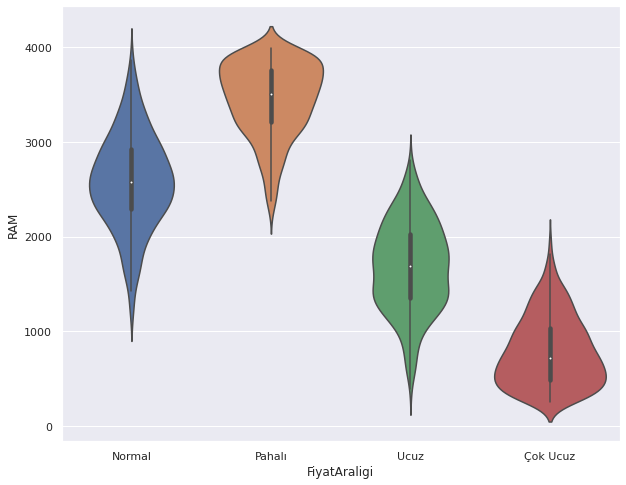

In [21]:
sns.violinplot(y=df["RAM"],x=df["FiyatAraligi"])

<AxesSubplot:xlabel='RAM', ylabel='Density'>

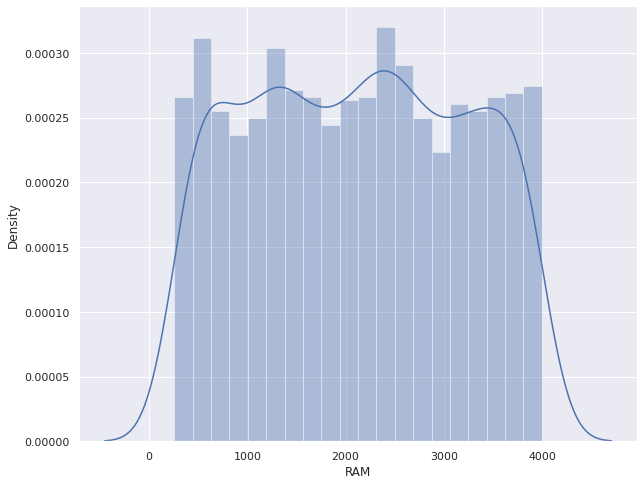

In [22]:
sns.distplot(df["RAM"],bins=20)

<AxesSubplot:xlabel='RAM'>

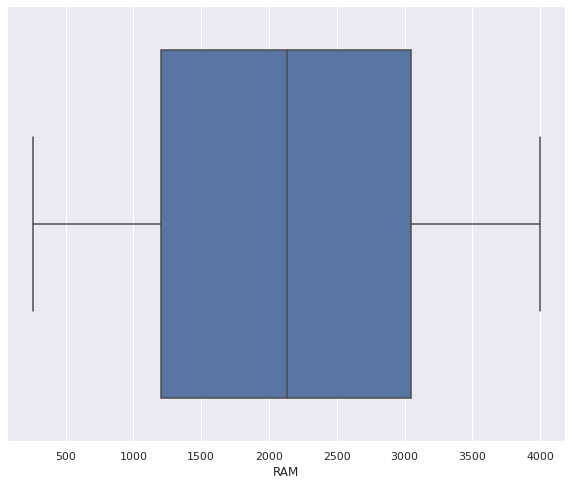

In [23]:
sns.boxplot(df["RAM"])

### Ön Kamera Dağılımlarına Göz Gezdirelim


<AxesSubplot:xlabel='OnKameraMP', ylabel='Density'>

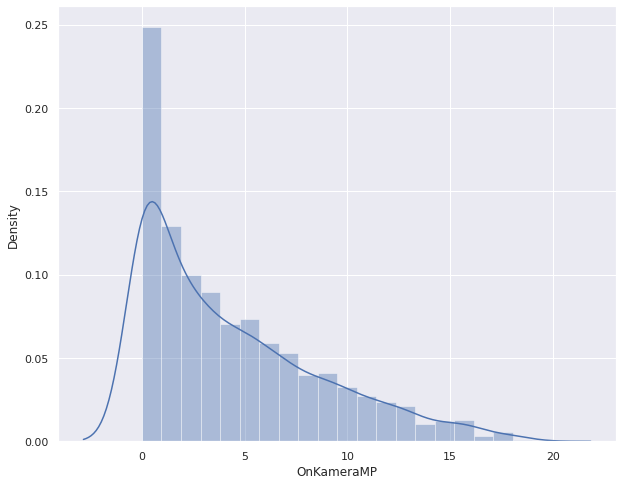

In [24]:
sns.distplot(df["OnKameraMP"],bins=20)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='OnKameraMP'>

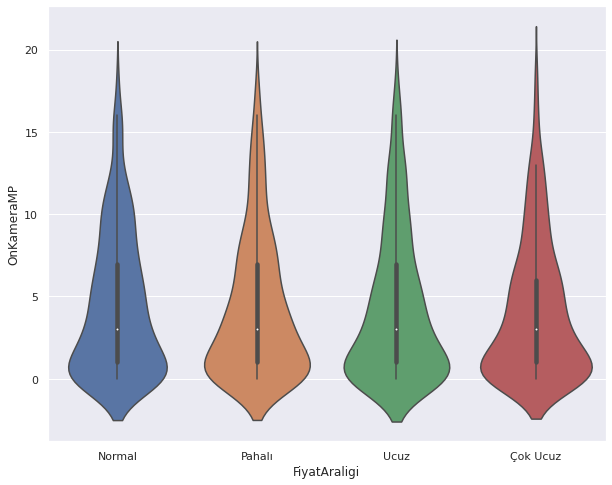

In [25]:
sns.violinplot(y=df["OnKameraMP"],x=df["FiyatAraligi"])

<AxesSubplot:xlabel='OnKameraMP'>

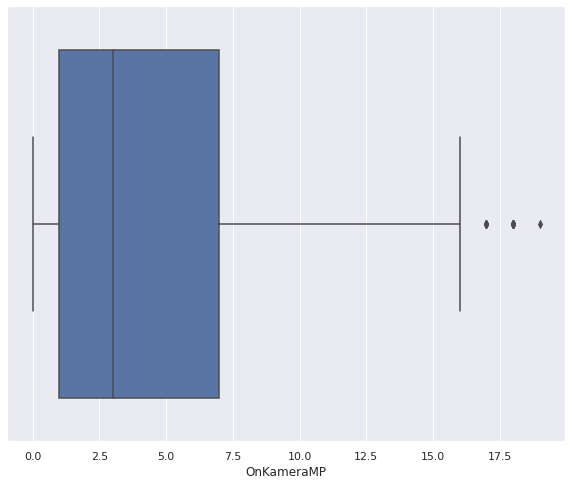

In [26]:
sns.boxplot(df["OnKameraMP"])

### Mikroişlemci Özniteliğinin Dağılımı

<AxesSubplot:xlabel='MikroislemciHizi', ylabel='Density'>

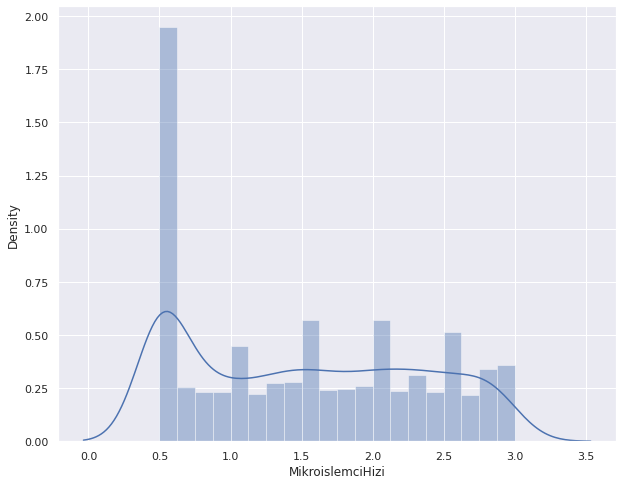

In [27]:
sns.distplot(df["MikroislemciHizi"],bins=20)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='MikroislemciHizi'>

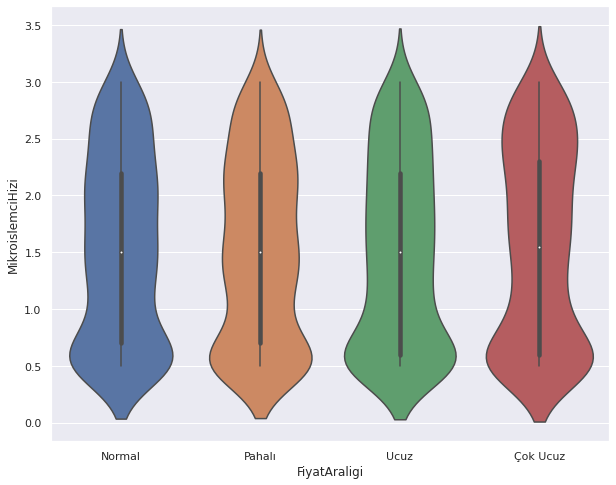

In [28]:
sns.violinplot(y=df["MikroislemciHizi"],x=df["FiyatAraligi"])

<AxesSubplot:xlabel='MikroislemciHizi'>

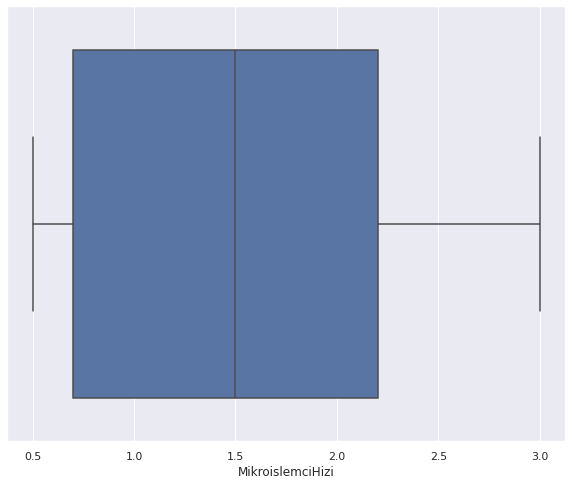

In [29]:
sns.boxplot(df["MikroislemciHizi"])

### ÇözünürlükYükseklik Özniteliğindeki Dağılım

<AxesSubplot:xlabel='CozunurlukYükseklik', ylabel='Density'>

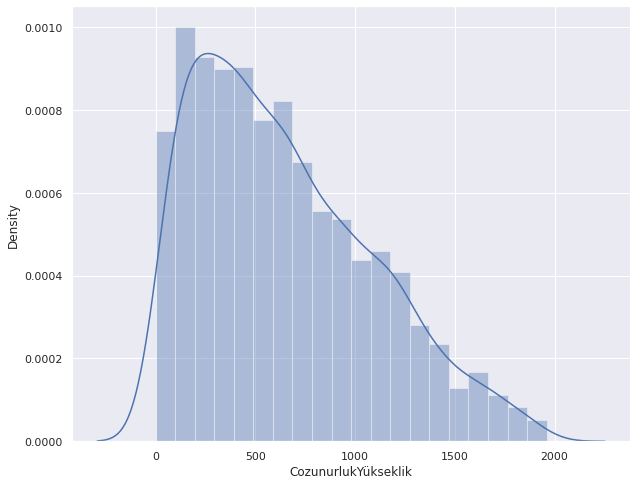

In [30]:
sns.distplot(df["CozunurlukYükseklik"],bins=20)

<AxesSubplot:xlabel='FiyatAraligi', ylabel='CozunurlukYükseklik'>

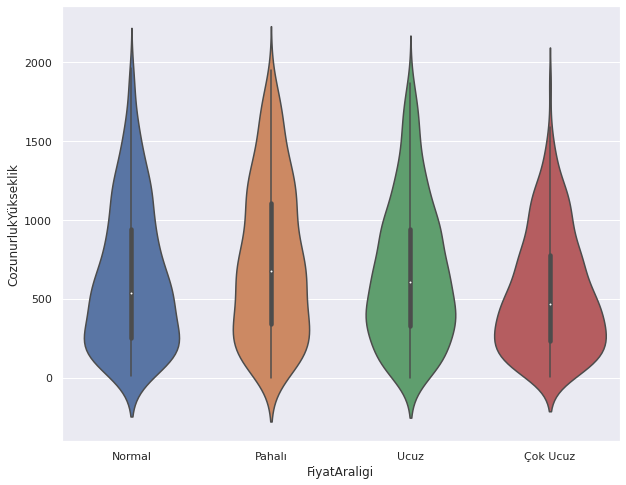

In [31]:
sns.violinplot(y=df["CozunurlukYükseklik"],x=df["FiyatAraligi"])

<AxesSubplot:xlabel='CozunurlukYükseklik'>

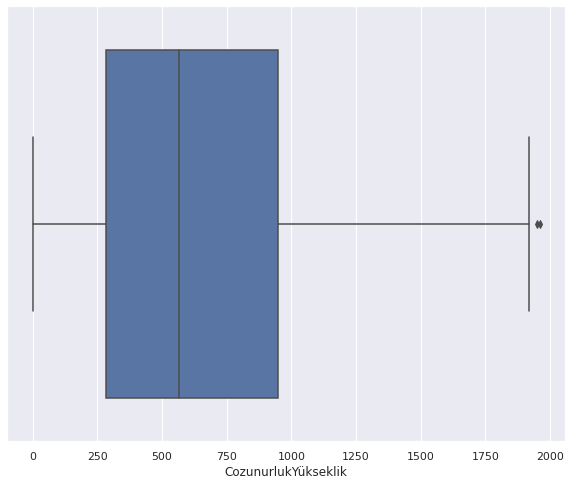

In [32]:
sns.boxplot(df["CozunurlukYükseklik"])

### Korelasyon İlişkilerine Bakalım. <a id="8"> </a>

In [33]:
corr = df.corr()
corr

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


<AxesSubplot:>

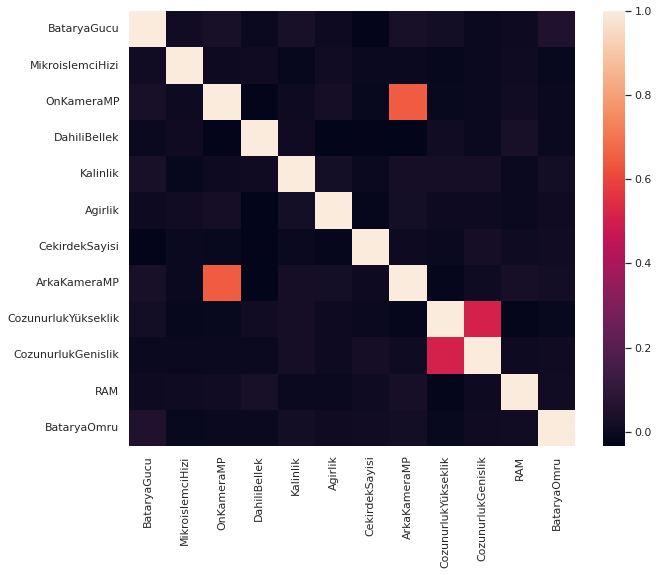

In [34]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

Ön ve arka kamera arasında pozitif yönlü  güçlü bir ilişki mevcut. Görselleştirerek inceleyelim. 

<AxesSubplot:xlabel='ArkaKameraMP', ylabel='OnKameraMP'>

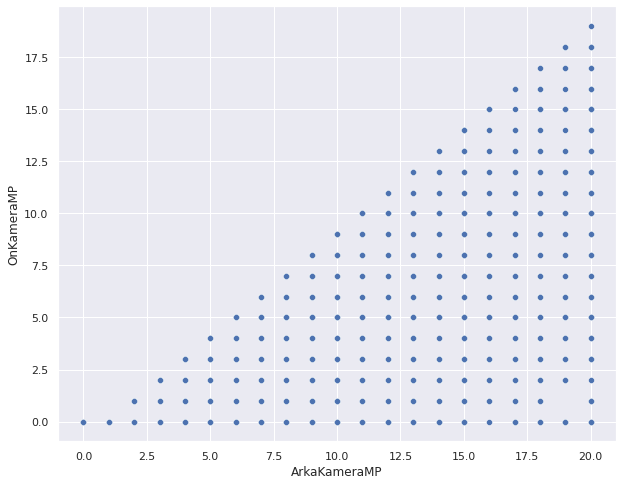

In [35]:
sns.scatterplot(x="ArkaKameraMP", y="OnKameraMP",data=df)

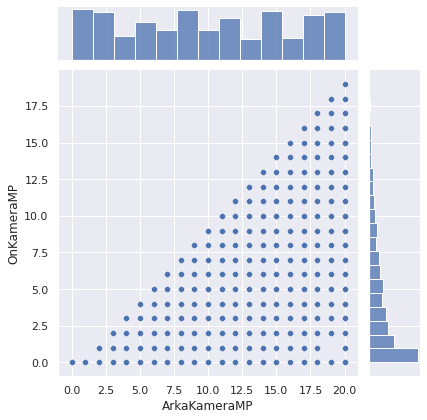

In [36]:
sns.jointplot(x="ArkaKameraMP",y="OnKameraMP",data=df)

<AxesSubplot:xlabel='CozunurlukGenislik', ylabel='CozunurlukYükseklik'>

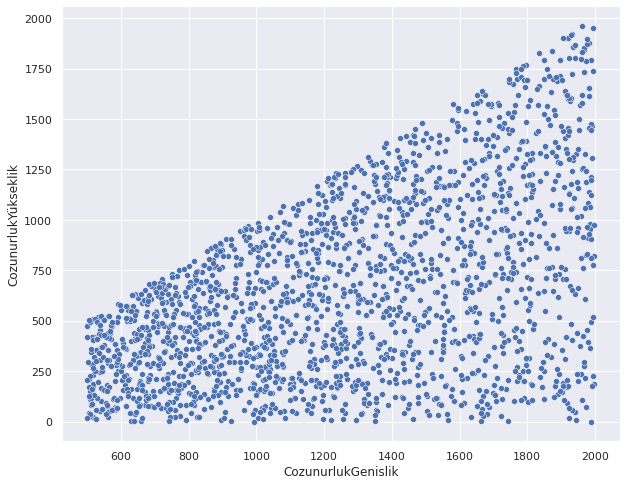

In [37]:
sns.scatterplot(x="CozunurlukGenislik",y="CozunurlukYükseklik",data=df)

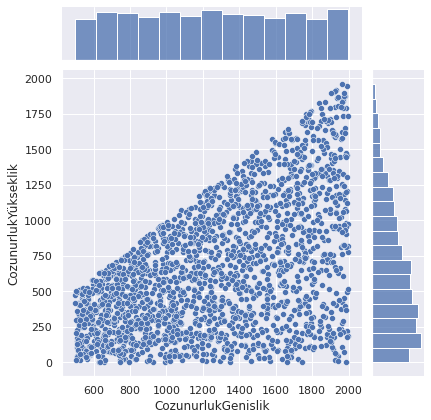

In [38]:
sns.jointplot(x="CozunurlukGenislik",y="CozunurlukYükseklik",data=df)

## Ön işleme ve Eksik Verilerin Tamamlanma Safhası <a id="9"> </a>


In [39]:
df.isnull().sum().sum()

17

In [40]:
df.isnull().sum() 

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

<AxesSubplot:>

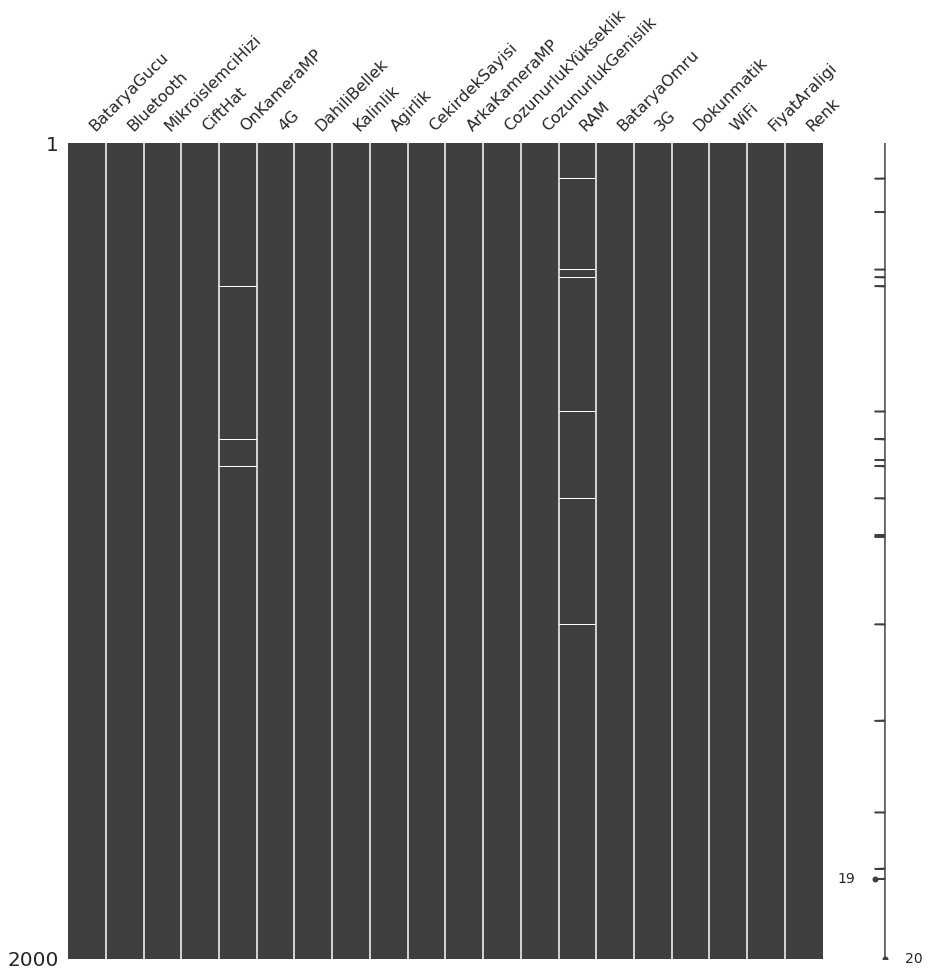

In [41]:
missingno.matrix(df,figsize=(15,15))

<AxesSubplot:>

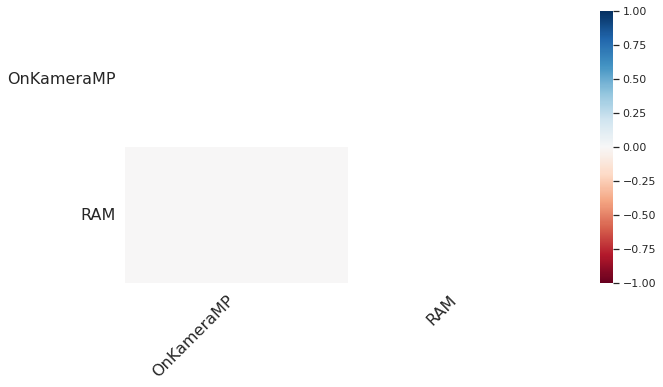

In [42]:
missingno.heatmap(df, figsize= (10,5))

In [43]:
df[df["OnKameraMP"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
351,726,Yok,2.2,Yok,NaN,Var,40,0.8,94,4,20,323,978,1342.0,4,Var,Var,Var,Çok Ucuz,Beyaz
726,1296,Yok,0.9,Var,NaN,Var,14,0.5,124,5,3,811,1272,490.0,4,Var,Var,Var,Çok Ucuz,Sarı
792,504,Yok,2.8,Var,NaN,Yok,40,0.5,178,3,0,626,1195,470.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1416,1617,Var,2.4,Yok,NaN,Var,36,0.8,85,1,9,743,1426,296.0,7,Var,Yok,Yok,Çok Ucuz,Sarı
1641,763,Yok,1.7,Var,NaN,Var,2,0.5,92,8,14,1028,1186,1050.0,8,Var,Var,Yok,Çok Ucuz,Siyah


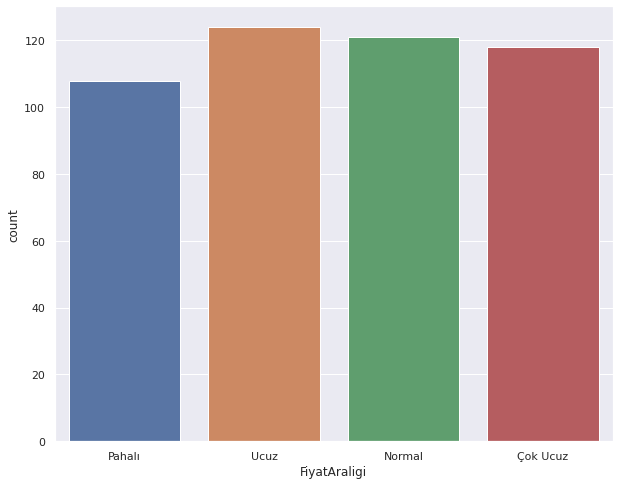

In [44]:
sns.countplot(df[df["OnKameraMP"] == 0]["FiyatAraligi"]); 

Bu grafiktede görüldüğü üzere ön kamera tabletin fiyat aralığını belirtmiyor. Bu yüzden eksik verileri Çok ucuz fiyat aralığında olan verilerin ortalaması ile doldurabiliriz.

In [45]:
df.groupby("FiyatAraligi")["OnKameraMP"].mean()

FiyatAraligi
Normal      4.498000
Pahalı      4.316000
Ucuz        4.340000
Çok Ucuz    4.092929
Name: OnKameraMP, dtype: float64

In [46]:
bos_olan_onKamera = df[df["OnKameraMP"].isnull()].index
bos_olan_onKamera

Int64Index([351, 726, 792, 1416, 1641], dtype='int64')

In [47]:
df.loc[bos_olan_onKamera ,"OnKameraMP"] = 4 

In [48]:
df[df["OnKameraMP"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk


In [49]:
df[df["RAM"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
87,1062,Var,2.5,Var,6.0,Yok,10,0.9,160,1,13,1596,1807,NaN,16,Yok,Yok,Var,Pahalı,Gri
169,1944,Var,1.8,Var,0.0,Var,31,0.8,87,4,10,1111,1362,NaN,8,Var,Yok,Yok,Pahalı,Beyaz
310,1479,Var,1.8,Var,0.0,Var,24,0.1,146,6,0,327,645,NaN,5,Var,Yok,Yok,Pahalı,Turuncu
329,1035,Yok,0.6,Var,2.0,Var,44,0.5,99,3,3,236,1960,NaN,12,Var,Var,Yok,Pahalı,Beyaz
658,732,Var,1.3,Yok,5.0,Var,32,0.4,163,8,7,1661,1836,NaN,5,Var,Yok,Var,Pahalı,Siyah
777,753,Var,0.5,Yok,11.0,Var,48,0.1,121,8,20,606,1316,NaN,16,Var,Yok,Yok,Pahalı,Turkuaz
871,1035,Var,2.7,Yok,1.0,Yok,40,0.2,157,5,15,757,1912,NaN,5,Yok,Var,Var,Pahalı,Turuncu
961,1949,Yok,1.3,Var,0.0,Yok,23,0.1,101,5,1,839,1136,NaN,20,Var,Yok,Yok,Pahalı,Sarı
965,1786,Yok,1.2,Yok,11.0,Yok,61,0.1,123,3,14,74,865,NaN,17,Yok,Var,Yok,Pahalı,Kahverengi
1180,1369,Var,1.8,Var,6.0,Yok,34,0.5,162,1,7,553,727,NaN,18,Yok,Var,Var,Pahalı,Turuncu


In [50]:
df.groupby("FiyatAraligi")["RAM"].mean()

FiyatAraligi
Normal      2582.81600
Pahalı      3449.35041
Ucuz        1679.49000
Çok Ucuz     785.31400
Name: RAM, dtype: float64

In [51]:
bos_olan_ram= df[df["RAM"].isnull()].index
bos_olan_ram

Int64Index([87, 169, 310, 329, 658, 777, 871, 961, 965, 1180, 1779, 1804], dtype='int64')

In [52]:
df.loc[bos_olan_ram ,"RAM"] = 3450 

In [53]:
df[df["RAM"].isnull()]

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk


In [54]:
df.isnull().sum().sum()

0

### Aykırı veriler <a id="10"> </a>

Yukarıda bazı özniteliklerin dağılımına bakıp boxplotlarını çizdirmiştik. Bu grafiklerden gördüğümüz üzere 3 farklı özniteliğimizde aykırı veriler bulunuyor.Bunlar;
* OnKameraMP
* CozunurlukYükseklik
* ArkaKameraMp

### OnKameraMp

<AxesSubplot:xlabel='OnKameraMP'>

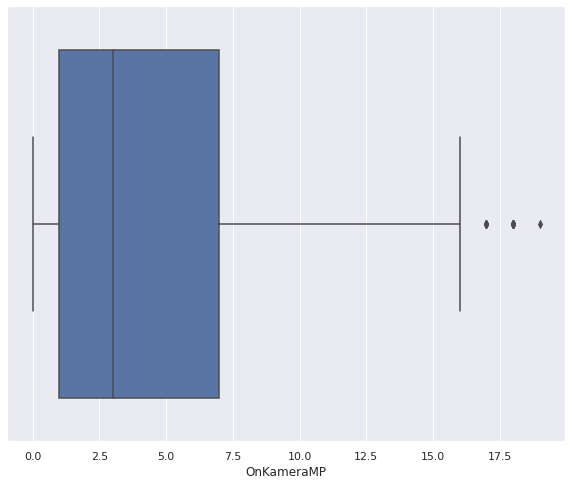

In [55]:
sns.boxplot(df["OnKameraMP"])

In [56]:
Q1 = df["OnKameraMP"].quantile(0.25) 
Q2 = df["OnKameraMP"].quantile(0.5) 
Q3 = df["OnKameraMP"].quantile(0.75)
Q4 = df["OnKameraMP"].quantile(1)

IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

In [57]:
print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)

print()

print("Alt sınır: ", alt_sinir)
print("Üst sınır: ", ust_sinir)



Q1 -> 1.0

Q3 -> 7.0

Q2 -> 3.0

Q4 -> 19.0

IQR -> 6.0



Alt sınır:  -8.0

Üst sınır:  16.0


In [58]:
outliers_df = df[(df["OnKameraMP"] < alt_sinir) | (df["OnKameraMP"] > ust_sinir)]
outliers_df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
246,1708,Var,2.4,Var,18.0,Var,49,0.1,109,1,19,233,517,3388.0,16,Var,Var,Var,Pahalı,Turkuaz
397,1290,Var,1.4,Var,19.0,Var,35,0.3,110,4,20,405,742,879.0,8,Var,Yok,Yok,Çok Ucuz,Siyah
401,1957,Yok,1.2,Var,18.0,Var,36,0.8,151,2,19,1194,1727,1115.0,18,Var,Yok,Var,Ucuz,Turuncu
513,1703,Var,1.5,Var,17.0,Var,55,0.7,138,5,19,1411,1711,2993.0,20,Var,Var,Var,Pahalı,Yeşil
642,591,Yok,2.1,Var,18.0,Var,16,0.5,196,7,20,952,1726,704.0,4,Var,Var,Var,Çok Ucuz,Kırmızı
661,946,Var,2.6,Var,17.0,Yok,5,0.1,166,3,20,1698,1771,3720.0,4,Yok,Var,Yok,Pahalı,Kırmızı
867,1772,Var,1.6,Yok,17.0,Var,45,0.5,159,2,18,837,1405,1146.0,17,Var,Var,Yok,Ucuz,Turkuaz
896,1448,Yok,0.5,Var,18.0,Yok,2,0.2,100,5,19,846,1144,593.0,18,Var,Var,Var,Çok Ucuz,Turkuaz
920,1348,Yok,2.0,Yok,18.0,Yok,52,0.3,98,3,20,1869,1942,955.0,7,Var,Var,Var,Ucuz,Mavi
975,1937,Var,1.7,Yok,17.0,Yok,58,0.6,189,1,19,1728,1767,3321.0,14,Var,Var,Yok,Pahalı,Kahverengi


<AxesSubplot:xlabel='OnKameraMP'>

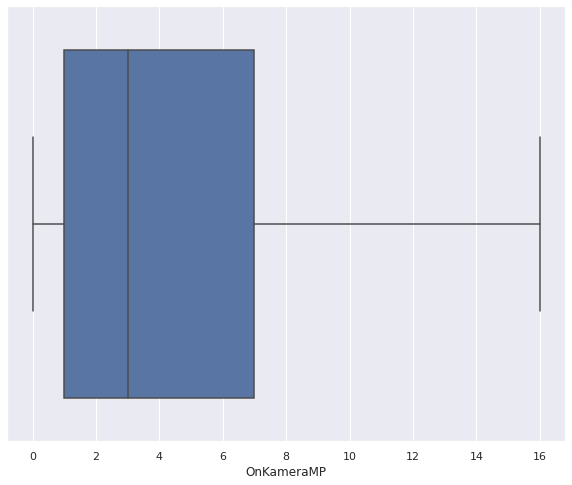

In [59]:
OnKameraMp = df['OnKameraMP']
ust_aykiri_veriler = (OnKameraMp > ust_sinir)
OnKameraMp[ust_aykiri_veriler] = ust_sinir
sns.boxplot(df["OnKameraMP"])


### CozunurlukYukseklik

<AxesSubplot:xlabel='CozunurlukYükseklik'>

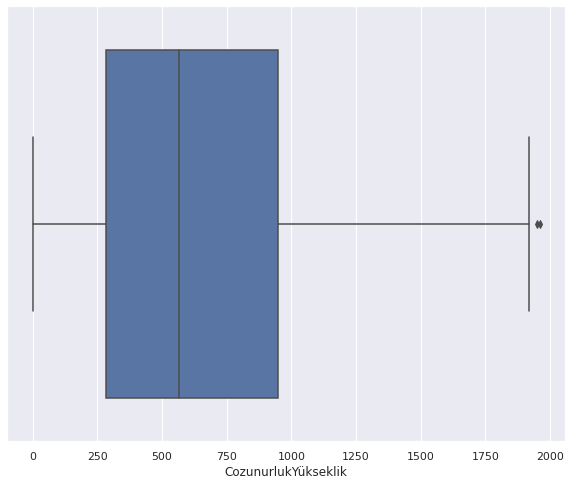

In [60]:
sns.boxplot(df["CozunurlukYükseklik"]) ## çözünürlükte 0 değeri var

In [61]:
df.drop(df.index[df["CozunurlukYükseklik"]== 0], inplace=True)

In [62]:
Q1 = df["CozunurlukYükseklik"].quantile(0.25) 
Q2 = df["CozunurlukYükseklik"].quantile(0.5) 
Q3 = df["CozunurlukYükseklik"].quantile(0.75)
Q4 = df["CozunurlukYükseklik"].quantile(1)

IQR = Q3 - Q1

alt_sinir = Q1 - 1.5 * IQR
ust_sinir = Q3 + 1.5 * IQR

print("Q1 ->", Q1)
print("Q3 ->", Q3)
print("Q2 ->", Q2)
print("Q4 ->", Q4)
print("IQR ->", IQR)

print()

print("Alt sınır: ", alt_sinir)
print("Üst sınır: ", ust_sinir)

Q1 -> 284.0

Q3 -> 947.75

Q2 -> 565.5

Q4 -> 1960.0

IQR -> 663.75



Alt sınır:  -711.625

Üst sınır:  1943.375


In [63]:
outliers_df = df[(df["CozunurlukYükseklik"] < alt_sinir) | (df["CozunurlukYükseklik"] > ust_sinir)]
outliers_df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1115,1413,Var,0.5,Var,4.0,Var,45,0.4,104,5,6,1949,1994,2973.0,15,Var,Yok,Var,Pahalı,Kırmızı
1820,1230,Var,1.6,Yok,0.0,Var,48,0.7,111,7,2,1960,1963,1622.0,16,Var,Var,Var,Normal,Yeşil


<AxesSubplot:xlabel='CozunurlukYükseklik'>

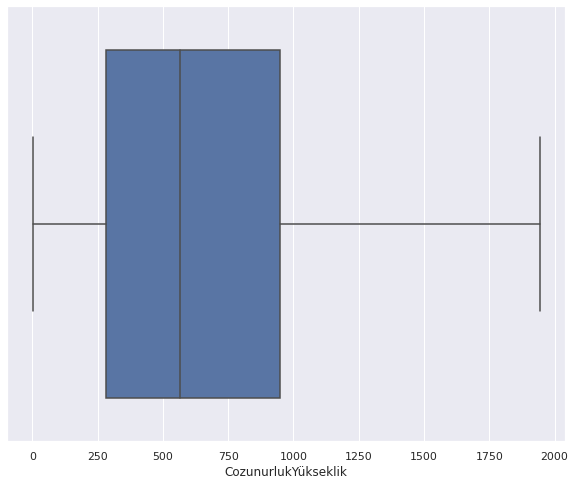

In [64]:
CozunurlukYukseklik = df['CozunurlukYükseklik']
ust_aykiri_veriler = (CozunurlukYukseklik > ust_sinir)
CozunurlukYukseklik[ust_aykiri_veriler] = ust_sinir
sns.boxplot(df["CozunurlukYükseklik"])

### Kategorik değerlere dönüştürme   <a id="11"> </a>

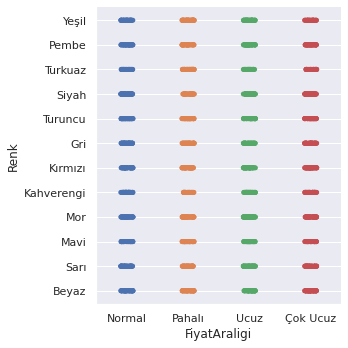

In [65]:
sns.catplot(x="FiyatAraligi", y="Renk",data = df)

Renklerin fiyat aralığına bir etkisi olmadığını gördük. Bu yüzden renk özniteliğini çıkartabiliriz.

In [66]:
df.drop('Renk', inplace=True, axis=1)

In [67]:
label_encoder = preprocessing.LabelEncoder()
df['Bluetooth'] = label_encoder.fit_transform(df['Bluetooth'])
df['CiftHat'] = label_encoder.fit_transform(df['CiftHat'])
df['4G'] = label_encoder.fit_transform(df['4G'])
df['3G'] = label_encoder.fit_transform(df['3G'])
df['Dokunmatik'] = label_encoder.fit_transform(df['Dokunmatik'])
df['WiFi'] = label_encoder.fit_transform(df['WiFi'])
df['FiyatAraligi'] = label_encoder.fit_transform(df['FiyatAraligi'])
df.head()

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi
0,1325,1,1.9,1,2.0,1,50,0.1,146,1,10,499.0,695,2328.0,2,0,1,1,0
1,1046,0,2.8,0,0.0,0,58,0.2,100,8,0,259.0,1040,3863.0,9,0,0,0,1
2,843,1,1.3,0,1.0,1,16,0.9,119,7,4,593.0,732,1734.0,14,1,1,0,2
3,894,1,0.5,0,1.0,0,50,0.5,199,3,14,1285.0,1462,3615.0,6,0,1,0,1
4,936,1,1.0,1,1.0,1,18,0.2,153,3,18,1330.0,1686,2391.0,3,0,0,0,0


## Modellerin oluşturulması ve eğitilmesi <a id="12"> </a>

In [68]:
y = df['FiyatAraligi']
X = df.drop(['FiyatAraligi'], axis=1)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)
                                                    

### GaussianNB  <a id="13"> </a>

In [70]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.796

Normal -> 0

Pahalı -> 1

Ucuz -> 2

Çok Ucuz -> 3

In [71]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

[[ 86  14  26   0]

 [ 17 103   1   0]

 [ 19   0  89  11]

 [  0   0  14 120]]


0.794

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.70      0.68      0.69       126

           1       0.88      0.85      0.87       121

           2       0.68      0.75      0.71       119

           3       0.92      0.90      0.91       134



    accuracy                           0.80       500

   macro avg       0.80      0.79      0.79       500

weighted avg       0.80      0.80      0.80       500




In [73]:
test = SelectKBest(k = len(X.columns))
fit = test.fit(X, y)
fit

SelectKBest(k=18)

In [74]:
for indis, skor in enumerate(fit.scores_):
    print(skor, " -> ", X.columns[indis])

31.314985987019536  ->  BataryaGucu

0.5159949624879449  ->  Bluetooth

0.5114661490252858  ->  MikroislemciHizi

0.45809299693421207  ->  CiftHat

0.780431860943027  ->  OnKameraMP

1.0213982356781734  ->  4G

2.90281019834061  ->  DahiliBellek

1.4871138784847564  ->  Kalinlik

3.50943294834677  ->  Agirlik

2.7286490649324957  ->  CekirdekSayisi

0.8205366950814421  ->  ArkaKameraMP

19.81159159510002  ->  CozunurlukYükseklik

22.33317855870339  ->  CozunurlukGenislik

3538.9483390155415  ->  RAM

1.6525391187192982  ->  BataryaOmru

0.45477410260448675  ->  3G

1.2785327146818934  ->  Dokunmatik

0.30498214246503075  ->  WiFi


In [75]:
y = df['FiyatAraligi']
X = df[["RAM","BataryaGucu","CozunurlukYükseklik","CozunurlukGenislik"]]

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)


In [76]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.794

In [77]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.8

In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.69      0.67      0.68       126

           1       0.86      0.84      0.85       121

           2       0.70      0.74      0.72       119

           3       0.92      0.91      0.91       134



    accuracy                           0.79       500

   macro avg       0.79      0.79      0.79       500

weighted avg       0.79      0.79      0.79       500




### Desicion tree <a id="14"> </a>

In [79]:
cart = DecisionTreeClassifier(random_state = 42,criterion="entropy")
cart_model = cart.fit(X_train, y_train)

In [80]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.866

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.81      0.84      0.82       126

           1       0.89      0.84      0.87       121

           2       0.83      0.87      0.85       119

           3       0.93      0.90      0.92       134



    accuracy                           0.87       500

   macro avg       0.87      0.87      0.87       500

weighted avg       0.87      0.87      0.87       500




In [82]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

[[106  12   8   0]

 [ 19 102   0   0]

 [  6   0 104   9]

 [  0   0  13 121]]


0.8

In [83]:
cart_grid = {"max_depth": range(1,20),
            "min_samples_split" : range(2,100)}
cart = DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 3, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)
print("En iyi parametreler : " + str(cart_cv_model.best_params_))
print("En iyi skor : " + str(cart_cv_model.best_score_))

Fitting 3 folds for each of 1862 candidates, totalling 5586 fits

[CV] END ...................max_depth=1, min_samples_split=2; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=3; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=4; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=5; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=6; total time=   0.0s

[CV] END ...................max_depth=1, min_samples_split=7; total time=   0.0s

[CV] END ...................max_

In [84]:
cart = DecisionTreeClassifier(max_depth = 17, min_samples_split =3)
cart_tuned = cart.fit(X_train, y_train)

In [85]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.866

In [86]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

[[106  12   8   0]

 [ 19 102   0   0]

 [  6   0 104   9]

 [  0   0  13 121]]


0.8

### KNN <a id="15"> </a>

In [87]:
knn_params = {"n_neighbors": np.arange(2,15)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv = 3)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [88]:
print("En iyi skor: " + str(knn_cv.best_score_))
print("En iyi parametreler: " + str(knn_cv.best_params_))

En iyi skor: 0.9205531062124249

En iyi parametreler: {'n_neighbors': 14}


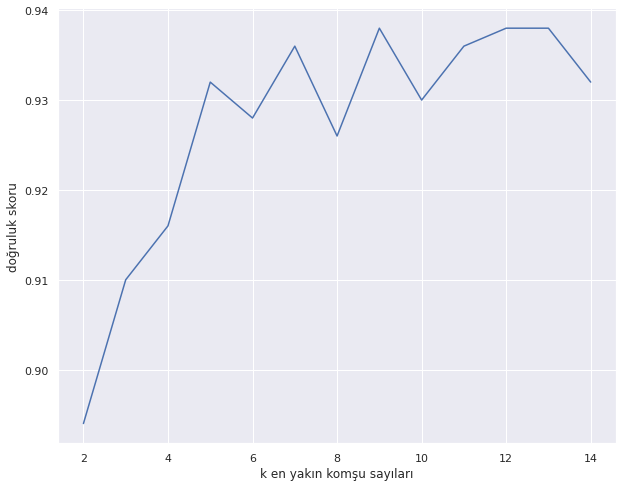

In [89]:
score_list = []

for each in range(2,15,1):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test, y_test))

plt.plot(range(2,15,1),score_list)
plt.xlabel("k en yakın komşu sayıları")
plt.ylabel("doğruluk skoru")
plt.show()

In [90]:
knn_tuned = KNeighborsClassifier(9)
knn_tuned = knn_tuned.fit(X_train, y_train)
y_pred = knn_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.938

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)
cross_val_score(knn_tuned, X_test, y_test, cv = 10).mean()

[[113   9   4   0]

 [  4 117   0   0]

 [  3   0 109   7]

 [  0   0   4 130]]


0.906

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       0.94      0.90      0.92       126

           1       0.93      0.97      0.95       121

           2       0.93      0.92      0.92       119

           3       0.95      0.97      0.96       134



    accuracy                           0.94       500

   macro avg       0.94      0.94      0.94       500

weighted avg       0.94      0.94      0.94       500


